# QRコードからバイナリデータを復元する

* バイナリ配列 0x01, 0x02, …, 0x05 → QRコード画像
* QRコードをデコードしてバイナリを取得
* オリジナルと比較






In [1]:
# ライブラリをインストール
!sudo apt install libzbar0
!pip install pyzbar
!pip install qrcode

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 0s (2,195 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readli

In [2]:
# 事前に Google Drive へ接続しておく
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ライブラリ読み込み
import sys
import os
from PIL import Image
from IPython.display import Image as disp_Image
from IPython.display import display_png
import cv2
from pyzbar.pyzbar import decode, ZBarSymbol
import qrcode

In [4]:
## QRコード群をデコード、連結してバイナリに戻す
def make_qr_png(bin_data, dst_path):
  qr = qrcode.QRCode(
      version=10,
      error_correction=qrcode.constants.ERROR_CORRECT_M,
      box_size=2,
      border=2,
  )
  # バージョン１０を指定しているが、入力データ量が多いと自動的に上位バージョンで生成される

  qr.add_data(bin_data) # バイナリデータも入力できる！
  qr.make(fit=True)
  img = qr.make_image()
  img.save(dst_path)
  print("output QR code file: " + dst_path)

In [5]:
# 作業ディレクトリ
work_dir = "/content/drive/MyDrive/QRコード操作"

data bytes array: 
b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~\x7f\x80\x81\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x8b\x8c\x8d\x8e\x8f\x90\x91\x92\x93\x94\x95\x96\x97\x98\x99\x9a\x9b\x9c\x9d\x9e\x9f\xa0\xa1\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xab\xac\xad\xae\xaf\xb0\xb1\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xbb\xbc\xbd\xbe\xbf\xc0\xc1\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xcb\xcc\xcd\xce\xcf\xd0\xd1\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xdb\xdc\xdd\xde\xdf\xe0\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xeb\xec\xed\xee\xef\xf0\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xfb\xfc\xfd\xfe'
output QR code file: /content/drive/MyDrive/QRコード操作/qr.png
/content/drive/MyDrive/QRコード操作/qr.png


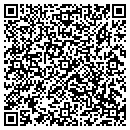

In [6]:
# バイナリデータをQRにする
qr_png = os.path.join(work_dir, "qr.png")
#data = bytes([0x01, 0x02, 0x03, 0x04, 0x05])
data = bytes()
for i in range(255):
  data = data + bytes([i])
print("data bytes array: ")
print(data)

make_qr_png(data, qr_png)

print(qr_png)
display_png(disp_Image(qr_png))

In [8]:
# QRをデコードする
#image = cv2.imread(qr_png)
image = Image.open(qr_png)
decoded_list = decode(image, symbols=[ZBarSymbol.QRCODE])

for decoded_qr in decoded_list:
  print(decoded_qr)
  d = decoded_qr.data
  p = decoded_qr.polygon
  break
  # 本来は複数のデコードデータが続くが、今回は一つのQR画像なので強制中断

print(type(d)) # バイナリで取れてる！
print("detected: ")
print(d)
print("org data:")
print(data)

if d == data:
  print("match org data!")
else:
  print("unmatch!!")


Decoded(data=b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~\x7f\xc2\x80\xc2\x81\xc2\x82\xc2\x83\xc2\x84\xc2\x85\xc2\x86\xc2\x87\xc2\x88\xc2\x89\xc2\x8a\xc2\x8b\xc2\x8c\xc2\x8d\xc2\x8e\xc2\x8f\xc2\x90\xc2\x91\xc2\x92\xc2\x93\xc2\x94\xc2\x95\xc2\x96\xc2\x97\xc2\x98\xc2\x99\xc2\x9a\xc2\x9b\xc2\x9c\xc2\x9d\xc2\x9e\xc2\x9f\xc2\xa0\xc2\xa1\xc2\xa2\xc2\xa3\xc2\xa4\xc2\xa5\xc2\xa6\xc2\xa7\xc2\xa8\xc2\xa9\xc2\xaa\xc2\xab\xc2\xac\xc2\xad\xc2\xae\xc2\xaf\xc2\xb0\xc2\xb1\xc2\xb2\xc2\xb3\xc2\xb4\xc2\xb5\xc2\xb6\xc2\xb7\xc2\xb8\xc2\xb9\xc2\xba\xc2\xbb\xc2\xbc\xc2\xbd\xc2\xbe\xc2\xbf\xc3\x80\xc3\x81\xc3\x82\xc3\x83\xc3\x84\xc3\x85\xc3\x86\xc3\x87\xc3\x88\xc3\x89\xc3\x8a\xc3\x8b\xc3\x8c\xc3\x8d\xc3\x8e\xc3\x8f\xc3\x90\xc3\x91\xc3\x92\xc3\x93\xc3\x94\xc3\x95\xc3\x96\xc3\x97\xc3\x98\xc3\x99\xc3\x9a\xc3\x9b\xc3\x9c\xc3\x9d\xc3\x9e\x

## デコード結果を見ると…
* x80 以降に xC2 や xC3 のシフトコード（？）が前置されてしまっている
* 多分文字列とみなして何か処理しているのではないかと推測
